In [1]:
import keras
keras.__version__

'2.4.3'

In [2]:
#! pip install keras --user

In [3]:
import os, shutil

In [4]:
# Ścieżka katalogu, do którego rozpakowano oryginalny zbiór danych.
original_dataset_dir = 'C:/Users/Kompuś/dvsc/train/train'

# Katalog, w którym umieszczone zostaną mniejsze zbiory danych.
base_dir = 'C:/Users/Kompuś/dvsc_small2222111'
os.mkdir(base_dir)

# Katalogi podzbiorów (zbioru treningowego, walidacyjnego i testowego).
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Katalog z treningowym zbiorem zdjęć kotów.
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Katalog z treningowym zbiorem zdjęć psów.
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Katalog z walidacyjnym zbiorem zdjęć kotów.
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Katalog z walidacyjnym zbiorem zdjęć psów.
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Katalog z testowym zbiorem zdjęć kotów.
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Katalog z testowym zbiorem zdjęć psów.
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Kopiuje 1500 pierwszych zdjęć kotów do folderu train_cats_dir.
fnames = ['cat.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Kopiuje 500 kolejnych obrazów kotów do folderu validation_cats_dir.
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Kopiuje 500 kolejnych obrazów kotów do folderu test_cats_dir.
fnames = ['cat.{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Kopiuje 1500 pierwszych zdjęć psów do folderu train_dogs_dir.
fnames = ['dog.{}.jpg'.format(i) for i in range(1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Kopiuje 500 kolejnych obrazów kotów do folderu validation_dogs_dir.
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Kopiuje 500 kolejnych obrazów kotów do folderu test_dogs_dir.
fnames = ['dog.{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

Sprawdźmy, ile zdjęć mamy w poszczególnych podzbiorach:

In [5]:
print('liczba obrazów treningowych kotów:', len(os.listdir(train_cats_dir)))

liczba obrazów treningowych kotów: 1500


In [6]:
print('liczba obrazów treningowych psów:', len(os.listdir(train_dogs_dir)))

liczba obrazów treningowych psów: 1500


In [7]:
print('liczba obrazów walidacyjnych kotów:', len(os.listdir(validation_cats_dir)))

liczba obrazów walidacyjnych kotów: 500


In [8]:
print('liczba obrazów walidacyjnych psów:', len(os.listdir(validation_dogs_dir)))

liczba obrazów walidacyjnych psów: 500


In [9]:
print('liczba obrazów testowych kotów:', len(os.listdir(test_cats_dir)))

liczba obrazów testowych kotów: 500


In [10]:
print('liczba obrazów testowych psów:', len(os.listdir(test_dogs_dir)))

liczba obrazów testowych psów: 500


In [11]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [13]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# Przeskalowuje wszystkie obrazy o współczynnik 1/255.
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Katalog docelowy.
        train_dir,
        # Zmienia rozdzielczość wszystkich obrazów na 150x150.
        target_size=(150, 150),
        batch_size=20,
        # Używamy funkcji binary_crossentropy w charakterze funkcji straty, a więc potrzebujemy binarnych etykiet.
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('kształt danych wsadowych:', data_batch.shape)
    print('kształt etykiet danych wsadowych:', labels_batch.shape)
    break

kształt danych wsadowych: (20, 150, 150, 3)
kształt etykiet danych wsadowych: (20,)


In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 38s 375ms/step - loss: 0.6961 - acc: 0.5292 - val_loss: 0.6746 - val_acc: 0.6020
Epoch 2/20
100/100 [==============================] - 40s 400ms/step - loss: 0.6768 - acc: 0.5500 - val_loss: 0.6537 - val_acc: 0.6230
Epoch 3/20
100/100 [==============================] - 37s 375ms/step - loss: 0.6255 - acc: 0.6736 - val_loss: 0.6213 - val_acc: 0.6690
Epoch 4/20
100/100 [==============================] - 38s 376ms/step - loss: 0.6031 - acc: 0.6706 - val_loss: 0.6019 - val_acc: 0.6920
Epoch 5/20
100/100 [==============================] - 38s 381ms/step - loss: 0.5779 - acc: 0.7082 - val_loss: 0.6074 - val_acc: 0.6610
Epoch 6/20
100/100 [==============================] - 37s 375ms/step - loss: 0.5376 - acc: 0.7323 - val_loss: 0.5575 - val_acc: 0.7070
Epoch 7/20
100/100 [==============================] - 38s 384ms/step - loss: 0.4814 - acc: 0.7644 - val_loss: 0.6013 - val_acc: 0.6710
Epoch 8/20
100/100 [==============================] - 4

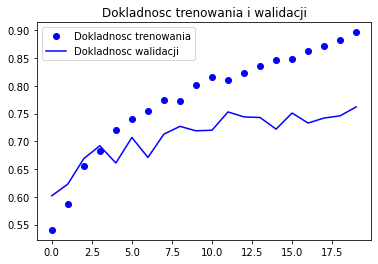

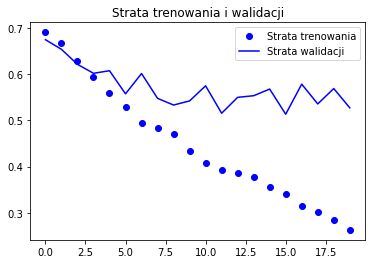

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [19]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

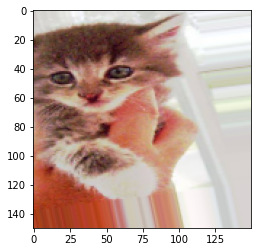

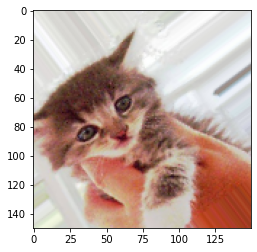

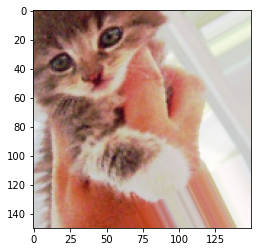

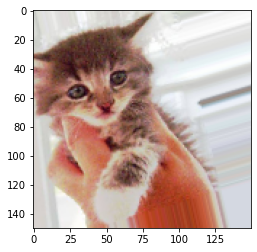

In [20]:
# Operacja importowania modułu zawierającego narzędzia przetwarzajace obrazy.
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Wybieramy obraz do zmodyfikowania.
img_path = fnames[3]

# Wczytujemy obraz i zmieniamy jego rozdzielczość.
img = image.load_img(img_path, target_size=(150, 150))

# Zamieniamy obraz w tablicę Numpy o kształcie (150, 150, 3).
x = image.img_to_array(img)

# Zmieniamy kształt na (1, 150, 150, 3).
x = x.reshape((1,) + x.shape)

# Polecenie .flow() generuje wsady obrazów zmodyfikowanych w sposób losowy. 
# Pętla jest wykonywana w nieskończoność, a więc należy ją w pewnym momencie przerwać!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Pamiętaj o tym, że nie powinno się modyfikować danych walidacyjnych!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Katalog docelowy.
        train_dir,
        # Zmienia rozdzielczość wszystkich obrazów na 150150.
        target_size=(150, 150),
        batch_size=32,
        # Korzystamy z funkcji straty binarnej entropii krzyżowej, a więc potrzebujemy etykiet w formie binarnej.
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)
      

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
94/94 [==============================] - 57s 598ms/step - loss: 0.6963 - acc: 0.4964 - val_loss: 0.6819 - val_acc: 0.5140
Epoch 2/100
94/94 [==============================] - 56s 595ms/step - loss: 0.6795 - acc: 0.5717 - val_loss: 0.6641 - val_acc: 0.6030
Epoch 3/100
94/94 [==============================] - 58s 613ms/step - loss: 0.6649 - acc: 0.5842 - val_loss: 0.6571 - val_acc: 0.6130
Epoch 4/100
94/94 [==============================] - 59s 626ms/step - loss: 0.6631 - acc: 0.5691 - val_loss: 0.6466 - val_acc: 0.6270
Epoch 5/100
94/94 [==============================] - 62s 655ms/step - loss: 0.6485 - acc: 0.6123 - val_loss: 0.6134 - val_acc: 0.6710
Epoch 6/100
94/94 [==============================] - 64s 679ms/step - loss: 0.6354 - acc: 0.6404 - val_loss: 0.5981 - val_acc: 0.6570
Epoch 7/100
94/94 [==============================] - 66s 698ms/step - loss: 0.6243 - acc: 0.6613 - val_loss: 0.6

In [23]:
#https://stackoverflow.com/questions/59864408/tensorflowyour-input-ran-out-of-data

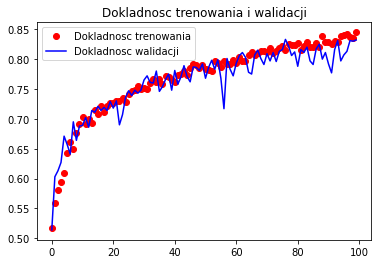

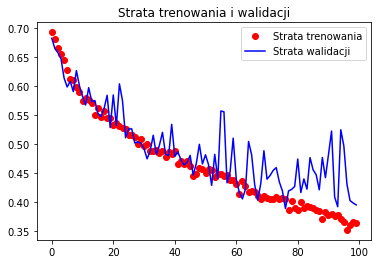

In [31]:
acc1 = history.history['acc']
val_acc1 = history.history['val_acc']
loss1 = history.history['loss']
val_loss1 = history.history['val_loss']

epochs = range(len(acc1))

plt.plot(epochs, acc1, 'ro', label='Dokladnosc trenowania')
plt.plot(epochs,val_acc1, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss1, 'ro', label='Strata trenowania')
plt.plot(epochs, val_loss1, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()

In [26]:
len(val_acc1)

100

In [32]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [33]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [34]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator



train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Generator zwraca dane w nieskończoność, a więc pętla musi zostać przerwana,
            # gdy każdy z obrazów zostanie przeanalizowany jednokrotnie.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 3000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [35]:
train_features = np.reshape(train_features, (3000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [36]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history1 = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
150/150 [==============================] - 3s 17ms/step - loss: 0.6596 - acc: 0.6168 - val_loss: 0.4058 - val_acc: 0.8350
Epoch 2/30
150/150 [==============================] - 3s 17ms/step - loss: 0.4293 - acc: 0.7991 - val_loss: 0.3388 - val_acc: 0.8530
Epoch 3/30
150/150 [==============================] - 2s 17ms/step - loss: 0.3214 - acc: 0.8699 - val_loss: 0.3096 - val_acc: 0.8700
Epoch 4/30
150/150 [==============================] - 2s 17ms/step - loss: 0.3008 - acc: 0.8766 - val_loss: 0.2949 - val_acc: 0.8720
Epoch 5/30
150/150 [==============================] - 2s 17ms/step - loss: 0.2610 - acc: 0.8951 - val_loss: 0.2892 - val_acc: 0.8720
Epoch 6/30
150/150 [==============================] - 3s 17ms/step - loss: 0.2436 - acc: 0.8968 - val_loss: 0.2740 - val_acc: 0.8760
Epoch 7/30
150/150 [==============================] - 2s 17ms/step - loss: 0.2254 - acc: 0.9128 - val_loss: 0.2688 - val_acc: 0.8760
Epoch 8/30
150/150 [==============================] - 2s 17ms/step - 

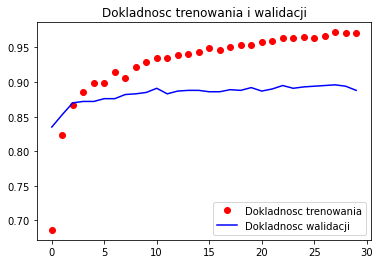

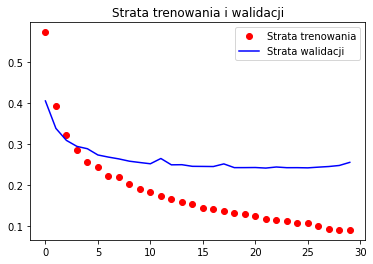

In [37]:


acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()

plt.show()